<a href="https://colab.research.google.com/github/Rocknroll-nerd/statistic/blob/main/posterior_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
!pip install arviz
!pip install --upgrade pymc3

Requirement already up-to-date: pymc3 in /usr/local/lib/python3.6/dist-packages (3.9.1)


In [ ]:
import pymc3 as pm
import arviz as az
pm.__version__

'3.9.1'

### Задание 1
В рамках той же задачи про число успехов. Вы получили 8 успехов из 15. Постройте постериорное распределение с помощью сеточной аппроксимации. 
- Получите 10000 сэмплов из распределения
-  Постройте эмпирическое постериорное распределение на основе сэмплирования. Сравните с сеточной аппроксимацией
- Постройте прогностическую модель на основе постериорного распределения. Какая вероятность получить 8 из 15 успехов при использовании этой модели
- Используя постериорное распределение получите вероятность выпадения 6 единиц из 9
- Сделайте все то же самое, но в качестве априорного распределения используйте следующее: 0 до 0.5 и константа после 0.5   

In [ ]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    p_grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1, grid_points)  
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [ ]:
#8 успехов из 15
p_grid, posterior = posterior_grid_approx(grid_points=100, success=8, tosses=15)

In [ ]:
#1000 сэмплов
samples_1000 = np.random.choice(p_grid, p=posterior, size = 1000, replace=True)

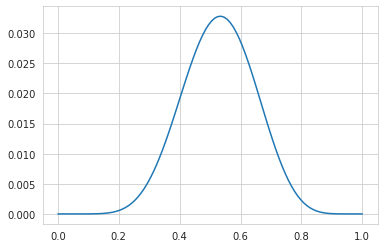

In [ ]:
#постериорное распределение, сеточная аппроксимация 
plt.plot(p_grid, posterior)

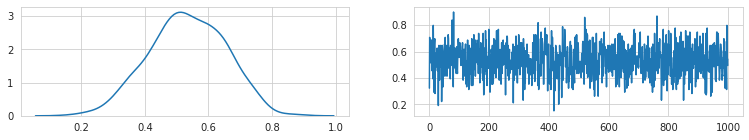

In [ ]:
plt.figure(figsize=(20,2))
plt.subplot(1,3,1); sns.kdeplot(samples_1000)
plt.subplot(1,3,2); plt.plot(samples_1000)

Сэмплирование важно для оценки распределения, поскольку оно дает возможность оценивать ожидание функции, говорить о истинных средних и дисперсиях, здесь мы можем говорить о возможных значениях вероятности выпадения, в нашем случае, 8 случаев из 15

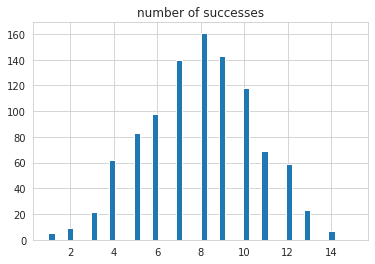

In [ ]:
#прогностическая модель на основе постериорного распр-я
prog_mod = stats.binom.rvs(n=15, p=samples_1000)
plt.hist(prog_mod, bins= 50)
plt.title('number of successes');

In [ ]:
np.median(samples_1000)

0.5353535353535354

In [ ]:
print('вероятность получить 8 из 15 на основе постериорного с помощью семплирования', stats.mode(samples_1000)[0][0], '\n')
print('вероятность 8 из 15 сеточной аппроксимацией', p_grid[posterior == max(posterior)][0])

вероятность получить 8 из 15 на основе постериорного с помощью семплирования 0.5858585858585859 

вероятность 8 из 15 сеточной аппроксимацией 0.010101010101010102


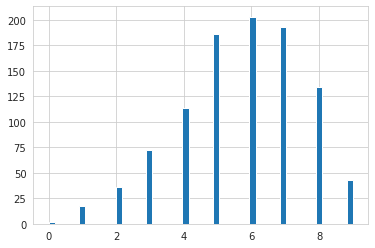

In [ ]:
#6 из 9
p_grid_69, post_69 = posterior_grid_approx()
last_samples = np.random.choice(p_grid_69, p=post_69, size=1000, replace=True)
from_last_samples = stats.binom.rvs(n=9, p=last_samples)
plt.hist(from_last_samples, bins= 50);

In [ ]:
#осталось построить распределение от 0 до 0.5 с константой после 0.5
def posterior_grid_const(grid_points=100, success=6, tosses=9):
    p_grid = np.linspace(0, 1, grid_points)
    prior = [0 if i<0.5 else 0.5 for i in p_grid]  
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [ ]:
p_g, post= posterior_grid_const()

In [ ]:
samples = np.random.choice(p_g, p=post, size = 1000, replace=True)

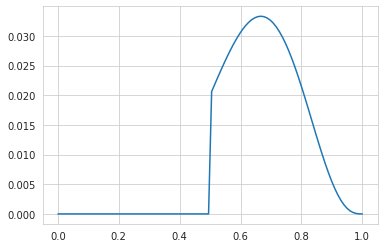

In [ ]:
plt.plot(p_g,post);

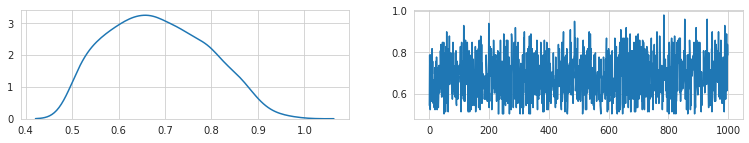

In [ ]:
plt.figure(figsize=(20,2))
plt.subplot(1,3,1); sns.kdeplot(samples)
plt.subplot(1,3,2); plt.plot(samples);

## Задание 2
Ниже приведены данные по 100 семьям с двумя детьми. В первом массиве указан пол первого ребенка, во втором пол второго ребенка. 

В рамках обычного статистического моделирования:
 - сделайте обычный тест на равенство шансов при рождении мальчиков и девочек
 - Проверьте гипотезу о равенстве полов в этих двух выборках
 - Проверьте гипотезу о независимость пола второго и первого ребенка  

In [ ]:
birth_1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth_2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [ ]:
x= np.concatenate((birth_1, birth_2))

In [ ]:
def draw_bs_reps(data, func, size=1):

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [ ]:
birth_bs=draw_bs_reps(data=x, func=np.mean, size=10000)

(array([   4.,   42.,  353., 1030., 2628., 3246., 1805.,  771.,  111.,
          10.]),
 array([0.405 , 0.4335, 0.462 , 0.4905, 0.519 , 0.5475, 0.576 , 0.6045,
        0.633 , 0.6615, 0.69  ]),
 <a list of 10 Patch objects>)

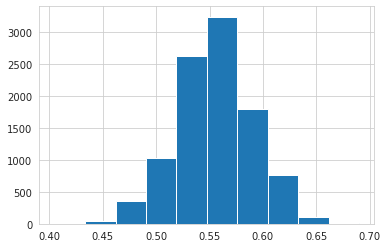

In [ ]:
plt.hist(birth_bs)

In [ ]:
np.percentile(birth_bs, [2.5, 97.5])

array([0.485, 0.625])

In [ ]:
p = np.sum(birth_bs == 0.5) / len(birth_bs)
p*2

0.03

Итак, при шансах получить выборку со средним 0.5 мальчиков и девочек, p-value  <0.05, при этом 95% значений лежит в достаточно узком интервале 0.485-0.625, скорее всего шансы действительно равны

тест на равенство полов в двух выборках:

In [ ]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [ ]:
def draw_perm_reps(func, data_1=birth_1, data_2=birth_2, size=10000):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [ ]:
def diff_of_means(data_1=birth_1, data_2=birth_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [ ]:
empirical_diff_means = diff_of_means()

perm_replicates = draw_perm_reps(diff_of_means)

p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print('p-value =', p)

p-value = 0.9235


тест на независимость

In [ ]:
b_1, b_2= permutation_sample(birth_1, birth_2)

In [ ]:
from scipy.stats import pearsonr
data1, data2 = b_1, b_2
corr, p = pearsonr(data1, data2)
print(corr, p)

-0.009949879346007107 0.9217335688292281


наблюдаем отрицательную корелляцию данных, выборки независимы

Посчитайте постериорное распределение для вероятности родиться мальчиком 
Сгенерируйте 10000 сэмплов и оцените HPD  интервал для 50%, 89% и 97%

допустим, мальчик – это 0

In [ ]:
x= np.concatenate((birth_1, birth_2))

In [ ]:
len(x)

200

In [ ]:
success_boy= (x == 0).sum()
success_boy

89

In [ ]:
#заменить np.repeat(?)
def p_g_approx_boy(grid_points=len(x), success=success_boy, tosses=len(x)):
    p_grid = np.linspace(0, 1, grid_points)
    prior =  np.repeat(1, grid_points)
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [ ]:
p_grid, posterior=p_g_approx_boy(grid_points=100, tosses=len(x))

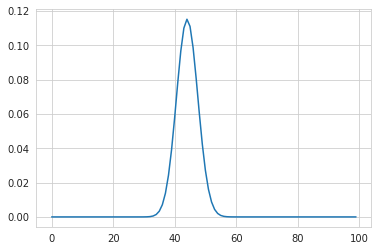

In [ ]:
plt.plot(posterior)

In [ ]:
samples_boys = np.random.choice(p_grid, p=posterior, size = 1000, replace=True)

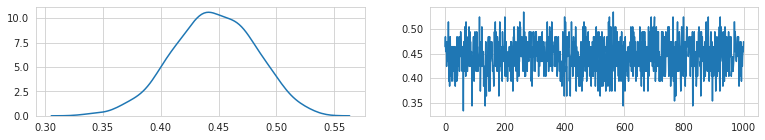

In [ ]:
plt.figure(figsize=(20,2))
plt.subplot(1,3,1); sns.kdeplot(samples_boys)
plt.subplot(1,3,2); plt.plot(samples_boys);

In [ ]:
az.hdi(samples_boys, credible_interval=0.5)

array([0.37373737, 0.50505051])

In [ ]:
az.hdi(samples_boys, credible_interval=0.11)

array([0.37373737, 0.50505051])

In [ ]:
az.hdi(samples_boys, credible_interval=0.03)

array([0.37373737, 0.50505051])

интересный одинаковый интервал, получается все значения вероятностей лежат в интервале 0.5(?)

Постройте предиктивное распределние числа рождений мальчиков из 200 человек. Какова вероятность получить 111 из 200?

In [ ]:
stat = stats.binom.rvs(n = 200, p = samples_boys)

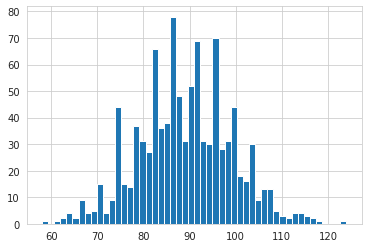

In [ ]:
plt.hist(stat, bins=50);

In [ ]:
print(f"Вероятность получить 111 мальчиков из 200 {np.mean(stat==111)}")

Probability to have 111 boys 0.001
